# 장기체류외국인(등록) 시군구별 거주 현황

입국한 날로부터 91일 이상 대한민국에 체류할 목적으로 「출입국관리법」제31조에 따라 체류지를 관할하는 지방 출입국· 외국인관서의 장에게 외국인등록을 하고 고유한 등록번호를 부여받은 외국인의 거주지역 (시군구)별 현황을 월별로 제공

In [1]:
import pandas as pd

df = pd.read_csv('../data/법무부_30(장기체류외국인_등록) 월별 등록외국인 시군구별 거주 현황_20220630.csv',
                 encoding='cp949'
                )

df

,년,월,시도,시군구,등록외국인 수
0,2022,1,강원도,강릉시,2344
1,2022,1,강원도,고성군,1202
2,2022,1,강원도,동해시,724
3,2022,1,강원도,삼척시,632
4,2022,1,강원도,속초시,1035
...,...,...,...,...,...
1495,2022,6,충청북도,청주시 상당구,1089
1496,2022,6,충청북도,청주시 서원구,2597
1497,2022,6,충청북도,청주시 청원구,3790
1498,2022,6,충청북도,청주시 흥덕구,4998


In [2]:
df['시도'].value_counts()

경기도        252
서울특별시      150
경상북도       144
경상남도       132
전라남도       132
강원도        108
부산광역시       96
충청남도        96
전라북도        90
충청북도        84
인천광역시       60
대구광역시       48
대전광역시       30
울산광역시       30
광주광역시       30
제주특별자치도     12
세종특별자치시      6
Name: 시도, dtype: int64

In [3]:
df.loc[df['시도']=='강원도']

,년,월,시도,시군구,등록외국인 수
0,2022,1,강원도,강릉시,2344
1,2022,1,강원도,고성군,1202
2,2022,1,강원도,동해시,724
3,2022,1,강원도,삼척시,632
4,2022,1,강원도,속초시,1035
...,...,...,...,...,...
1263,2022,6,강원도,태백시,257
1264,2022,6,강원도,평창군,554
1265,2022,6,강원도,홍천군,1046
1266,2022,6,강원도,화천군,332


In [4]:
df.loc[df['시도']=='제주특별자치도']

,년,월,시도,시군구,등록외국인 수
218,2022,1,제주특별자치도,서귀포시,6917
219,2022,1,제주특별자치도,제주시,13661
468,2022,2,제주특별자치도,서귀포시,6971
469,2022,2,제주특별자치도,제주시,13604
718,2022,3,제주특별자치도,서귀포시,6986
719,2022,3,제주특별자치도,제주시,13637
968,2022,4,제주특별자치도,서귀포시,7006
969,2022,4,제주특별자치도,제주시,13637
1218,2022,5,제주특별자치도,서귀포시,7016
1219,2022,5,제주특별자치도,제주시,13653


In [5]:
df = df.drop(['월'],axis=1)

In [6]:
country = '대한민국'
df['국가'] = country

In [7]:
df.dtypes

년           int64
시도         object
시군구        object
등록외국인 수     int64
국가         object
dtype: object

In [8]:
data = pd.pivot_table(df,
                      index = ['국가','시도'],
                      values = '등록외국인 수',
                      aggfunc = 'sum')

In [9]:
data

등록외국인 수
국가   시도              
대한민국 강원도       106056
     경기도      2159788
     경상남도      376561
     경상북도      307109
     광주광역시     124914
     대구광역시     164391
     대전광역시     108586
     부산광역시     237533
     서울특별시    1369187
     세종특별자치시    29403
     울산광역시     101581
     인천광역시     401856
     전라남도      196090
     전라북도      183710
     제주특별자치도   123774
     충청남도      374491
     충청북도      216135

In [10]:
data.to_csv('sido.csv')

In [11]:
data2 = pd.pivot_table(df,
                      index = ['국가','시도','시군구'],
                      values = '등록외국인 수',
                      aggfunc = 'sum')

In [12]:
data2

등록외국인 수
국가   시도   시군구             
대한민국 강원도  강릉시        14038
          고성군         7264
          동해시         4355
          삼척시         3915
          속초시         6267
...                    ...
     충청북도 청주시 상당구     6572
          청주시 서원구    15170
          청주시 청원구    22339
          청주시 흥덕구    29595
          충주시        27218

[250 rows x 1 columns]

In [15]:
data2.index

MultiIndex([('대한민국',  '강원도',     '강릉시'),
            ('대한민국',  '강원도',     '고성군'),
            ('대한민국',  '강원도',     '동해시'),
            ('대한민국',  '강원도',     '삼척시'),
            ('대한민국',  '강원도',     '속초시'),
            ('대한민국',  '강원도',     '양구군'),
            ('대한민국',  '강원도',     '양양군'),
            ('대한민국',  '강원도',     '영월군'),
            ('대한민국',  '강원도',     '원주시'),
            ('대한민국',  '강원도',     '인제군'),
            ...
            ('대한민국', '충청북도',     '옥천군'),
            ('대한민국', '충청북도',     '음성군'),
            ('대한민국', '충청북도',     '제천시'),
            ('대한민국', '충청북도',     '증평군'),
            ('대한민국', '충청북도',     '진천군'),
            ('대한민국', '충청북도', '청주시 상당구'),
            ('대한민국', '충청북도', '청주시 서원구'),
            ('대한민국', '충청북도', '청주시 청원구'),
            ('대한민국', '충청북도', '청주시 흥덕구'),
            ('대한민국', '충청북도',     '충주시')],
           names=['국가', '시도', '시군구'], length=250)

In [18]:
data2.index.unique().to_list()

[('대한민국', '강원도', '강릉시'),
 ('대한민국', '강원도', '고성군'),
 ('대한민국', '강원도', '동해시'),
 ('대한민국', '강원도', '삼척시'),
 ('대한민국', '강원도', '속초시'),
 ('대한민국', '강원도', '양구군'),
 ('대한민국', '강원도', '양양군'),
 ('대한민국', '강원도', '영월군'),
 ('대한민국', '강원도', '원주시'),
 ('대한민국', '강원도', '인제군'),
 ('대한민국', '강원도', '정선군'),
 ('대한민국', '강원도', '철원군'),
 ('대한민국', '강원도', '춘천시'),
 ('대한민국', '강원도', '태백시'),
 ('대한민국', '강원도', '평창군'),
 ('대한민국', '강원도', '홍천군'),
 ('대한민국', '강원도', '화천군'),
 ('대한민국', '강원도', '횡성군'),
 ('대한민국', '경기도', '가평군'),
 ('대한민국', '경기도', '고양시 덕양구'),
 ('대한민국', '경기도', '고양시 일산동구'),
 ('대한민국', '경기도', '고양시 일산서구'),
 ('대한민국', '경기도', '과천시'),
 ('대한민국', '경기도', '광명시'),
 ('대한민국', '경기도', '광주시'),
 ('대한민국', '경기도', '구리시'),
 ('대한민국', '경기도', '군포시'),
 ('대한민국', '경기도', '김포시'),
 ('대한민국', '경기도', '남양주시'),
 ('대한민국', '경기도', '동두천시'),
 ('대한민국', '경기도', '부천시'),
 ('대한민국', '경기도', '성남시 분당구'),
 ('대한민국', '경기도', '성남시 수정구'),
 ('대한민국', '경기도', '성남시 중원구'),
 ('대한민국', '경기도', '수원시 권선구'),
 ('대한민국', '경기도', '수원시 영통구'),
 ('대한민국', '경기도', '수원시 장안구'),
 ('대한민국', '경기도', '수원시 팔달구'),
 ('대한민

In [14]:
data2.to_csv('sigoon.csv')

In [126]:
data2.sort_values('등록외국인 수', ascending=False)

등록외국인 수
국가   시도    시군구             
대한민국 경기도   화성시       210858
           안산시 단원구   205139
           시흥시       188358
           평택시       145203
     서울특별시 구로구       144059
...                     ...
     충청남도  계룡시         1121
     전라남도  구례군         1113
     경상북도  청송군         1096
     충청북도  단양군         1091
     경상북도  울릉군          751

[250 rows x 1 columns]

In [127]:
data3 = data2.sort_values('등록외국인 수', ascending=False)
data3[:20]

등록외국인 수
국가   시도      시군구             
대한민국 경기도     화성시       210858
             안산시 단원구   205139
             시흥시       188358
             평택시       145203
     서울특별시   구로구       144059
     경기도     부천시       142480
     서울특별시   영등포구      141326
     경기도     김포시       106813
     충청남도    아산시        97547
     경상남도    김해시        95908
     서울특별시   동대문구       88994
             용산구        86303
     인천광역시   부평구        83861
     서울특별시   관악구        83269
             금천구        82918
     제주특별자치도 제주시        81923
     서울특별시   광진구        76073
     인천광역시   연수구        75633
     경기도     안산시 상록구    74026
     광주광역시   광산구        70340

In [43]:
# 한글폰트 적용
import matplotlib.pyplot as plt
plt.rc("font",family="AppleGothic")

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '(대한민국, 강원도)'),
  Text(1, 0, '(대한민국, 경기도)'),
  Text(2, 0, '(대한민국, 경상남도)'),
  Text(3, 0, '(대한민국, 경상북도)'),
  Text(4, 0, '(대한민국, 광주광역시)'),
  Text(5, 0, '(대한민국, 대구광역시)'),
  Text(6, 0, '(대한민국, 대전광역시)'),
  Text(7, 0, '(대한민국, 부산광역시)'),
  Text(8, 0, '(대한민국, 서울특별시)'),
  Text(9, 0, '(대한민국, 세종특별자치시)'),
  Text(10, 0, '(대한민국, 울산광역시)'),
  Text(11, 0, '(대한민국, 인천광역시)'),
  Text(12, 0, '(대한민국, 전라남도)'),
  Text(13, 0, '(대한민국, 전라북도)'),
  Text(14, 0, '(대한민국, 제주특별자치도)'),
  Text(15, 0, '(대한민국, 충청남도)'),
  Text(16, 0, '(대한민국, 충청북도)')])

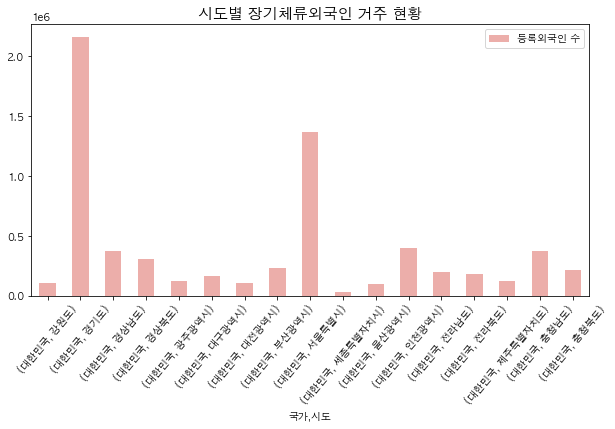

In [44]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('hls',len('시도'))

data.plot(kind='bar', color=colors, figsize=(10,5), alpha=0.5)
plt.title("시도별 장기체류외국인 거주 현황",fontsize=15)
plt.xticks(rotation=50)


# 행정구역 주민등록인구

In [194]:
import pandas as pd

ingu = pd.read_csv('행정구역_읍면동_별_5세별_주민등록인구_2011년__20220824153434.csv',
                 encoding='cp949',
                 header=1,
                )

ingu.head()

,행정구역(동읍면)별,항목,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,총인구수 (명),51574446,1462542,2162139,2370782,2325985,3025167,3506469,3270095,...,4112672,4194126,3085495,2186052,1621812,1260785,657349,225077,48526,8533
1,전국,남자인구수 (명),25708650,749841,1107540,1219290,1202991,1574862,1849111,1709036,...,2080415,2076608,1493177,1024795,708641,486186,205653,52342,9173,1558
2,전국,여자인구수 (명),25865796,712701,1054599,1151492,1122994,1450305,1657358,1561059,...,2032257,2117518,1592318,1161257,913171,774599,451696,172735,39353,6975
3,서울특별시,총인구수 (명),9493211,234012,327639,366293,385837,594528,816914,748492,...,702152,723288,568471,407734,305221,212098,99901,34574,8209,1743
4,서울특별시,남자인구수 (명),4604405,120802,167636,188149,196635,280562,395964,374091,...,345221,345225,265132,187512,136368,89629,34920,9269,1858,431


In [195]:
ingu.항목.unique()

array(['총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)'], dtype=object)

In [196]:
index1 = ingu[(ingu['항목'] == '남자인구수 (명)') |(ingu['항목'] == '여자인구수 (명)')].index
ingu = ingu.drop(index1)

In [197]:
country = '대한민국'
ingu['국가'] = country

In [198]:
ingu.columns

Index(['행정구역(동읍면)별', '항목', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+', '국가'],
      dtype='object')

In [199]:
ingu.head()

,행정구역(동읍면)별,항목,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,국가
0,전국,총인구수 (명),51574446,1462542,2162139,2370782,2325985,3025167,3506469,3270095,...,4194126,3085495,2186052,1621812,1260785,657349,225077,48526,8533,대한민국
3,서울특별시,총인구수 (명),9493211,234012,327639,366293,385837,594528,816914,748492,...,723288,568471,407734,305221,212098,99901,34574,8209,1743,대한민국
6,부산광역시,총인구수 (명),3334595,83584,128376,134464,130780,187963,216501,197904,...,304093,247791,180488,125037,89106,40842,13249,2730,434,대한민국
9,대구광역시,총인구수 (명),2374120,63009,98766,107403,109972,145870,155912,139186,...,198552,147823,108227,74386,57613,28783,8946,1686,264,대한민국
12,인천광역시,총인구수 (명),2960580,86103,125739,137755,133218,172473,211268,200329,...,245126,164691,107503,78712,57024,29799,10823,2547,440,대한민국


In [200]:
ingu['0-19세'] = ingu['0 - 4세'] + ingu['5 - 9세'] +ingu['10 - 14세'] + ingu['15 - 19세']
ingu['20-39세'] = ingu['20 - 24세'] + ingu['25 - 29세'] +ingu['30 - 34세'] + ingu['35 - 39세']
ingu['40-59세'] = ingu['40 - 44세'] + ingu['45 - 49세'] +ingu['50 - 54세'] + ingu['55 - 59세']
ingu['60-100+세'] = ingu['60 - 64세'] + ingu['65 - 69세'] +ingu['70 - 74세'] + ingu['75 - 79세'] + ingu['80 - 84세'] + ingu['85 - 89세'] + ingu['90 - 94세'] + ingu['95 - 99세']+ ingu['100+']

In [201]:
ingu.columns

Index(['행정구역(동읍면)별', '항목', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+', '국가', '0-19세',
       '20-39세', '40-59세', '60-100+세'],
      dtype='object')

In [202]:
ingu.drop(['항목'],axis=1,inplace=True)

In [203]:
ingu.columns

Index(['행정구역(동읍면)별', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+', '국가', '0-19세',
       '20-39세', '40-59세', '60-100+세'],
      dtype='object')

In [204]:
ingu.drop(['계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+'],axis=1,inplace=True)

In [205]:
ingu.columns

Index(['행정구역(동읍면)별', '국가', '0-19세', '20-39세', '40-59세', '60-100+세'], dtype='object')

In [206]:
ingu.columns= ['행정구역(동읍면)별','국가','0-19세', '20-39세', '40-59세', '60-100+세']

In [207]:
ingu.head()

,행정구역(동읍면)별,국가,0-19세,20-39세,40-59세,60-100+세
0,전국,대한민국,8321448,13178639,16786604,13287755
3,서울특별시,대한민국,1313781,2841957,2976234,2361239
6,부산광역시,대한민국,477204,804598,1049023,1003770
9,대구광역시,대한민국,379150,583196,785494,626280
12,인천광역시,대한민국,482815,786683,994417,696665


In [208]:
ingu = ingu[['국가','행정구역(동읍면)별','0-19세', '20-39세', '40-59세', '60-100+세']]
ingu.head()

,국가,행정구역(동읍면)별,0-19세,20-39세,40-59세,60-100+세
0,대한민국,전국,8321448,13178639,16786604,13287755
3,대한민국,서울특별시,1313781,2841957,2976234,2361239
6,대한민국,부산광역시,477204,804598,1049023,1003770
9,대한민국,대구광역시,379150,583196,785494,626280
12,대한민국,인천광역시,482815,786683,994417,696665


In [209]:
ingu['지역 총 인구'] = ingu.sum(axis=1)

/var/folders/v1/zh7hrj6j0h1gyhss4417qmqm0000gn/T/ipykernel_67574/3447626593.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ingu['지역 총 인구'] = ingu.sum(axis=1)


In [210]:
ingu = ingu.drop(index=[0], axis=0)

In [211]:
ingu = ingu.reset_index(drop=True)

In [212]:
ingu.head()

,국가,행정구역(동읍면)별,0-19세,20-39세,40-59세,60-100+세,지역 총 인구
0,대한민국,서울특별시,1313781,2841957,2976234,2361239,9493211
1,대한민국,부산광역시,477204,804598,1049023,1003770,3334595
2,대한민국,대구광역시,379150,583196,785494,626280,2374120
3,대한민국,인천광역시,482815,786683,994417,696665,2960580
4,대한민국,광주광역시,260464,380348,472780,321111,1434703


In [213]:
ingu.to_csv('ingu.csv')

In [214]:
ingu2 = ingu.copy()

In [215]:
ingu2.columns

Index(['국가', '행정구역(동읍면)별', '0-19세', '20-39세', '40-59세', '60-100+세', '지역 총 인구'], dtype='object')

In [216]:
ingu2['10대 이하'] = round((ingu2['0-19세'] / ingu2['지역 총 인구'])*100, 2)
ingu2['20대-30대'] = round((ingu2['20-39세'] / ingu2['지역 총 인구'])*100, 2)
ingu2['40대-50대'] = round((ingu2['40-59세'] / ingu2['지역 총 인구'])*100, 2)
ingu2['60세 이상'] = round((ingu2['60-100+세'] / ingu2['지역 총 인구'])*100, 2)
ingu2

,국가,행정구역(동읍면)별,0-19세,20-39세,40-59세,60-100+세,지역 총 인구,10대 이하,20대-30대,40대-50대,60세 이상
0,대한민국,서울특별시,1313781,2841957,2976234,2361239,9493211,13.84,29.94,31.35,24.87
1,대한민국,부산광역시,477204,804598,1049023,1003770,3334595,14.31,24.13,31.46,30.10
2,대한민국,대구광역시,379150,583196,785494,626280,2374120,15.97,24.56,33.09,26.38
3,대한민국,인천광역시,482815,786683,994417,696665,2960580,16.31,26.57,33.59,23.53
4,대한민국,광주광역시,260464,380348,472780,321111,1434703,18.15,26.51,32.95,22.38
5,대한민국,대전광역시,244624,394308,468908,340342,1448182,16.89,27.23,32.38,23.50
6,대한민국,울산광역시,197373,274602,388694,254084,1114753,17.71,24.63,34.87,22.79
7,대한민국,세종특별자치시,94405,100358,126587,59539,380889,24.79,26.35,33.23,15.63
8,대한민국,경기도,2389436,3649923,4587778,2962225,13589362,17.58,26.86,33.76,21.80
9,대한민국,강원도,230663,333350,482270,492895,1539178,14.99,21.66,31.33,32.02


In [217]:
ingu2.columns

Index(['국가', '행정구역(동읍면)별', '0-19세', '20-39세', '40-59세', '60-100+세', '지역 총 인구',
       '10대 이하', '20대-30대', '40대-50대', '60세 이상'],
      dtype='object')

In [218]:
ingu2.drop(['0-19세', '20-39세', '40-59세', '60-100+세', '지역 총 인구'],axis=1,inplace=True)

In [219]:
ingu2

,국가,행정구역(동읍면)별,10대 이하,20대-30대,40대-50대,60세 이상
0,대한민국,서울특별시,13.84,29.94,31.35,24.87
1,대한민국,부산광역시,14.31,24.13,31.46,30.10
2,대한민국,대구광역시,15.97,24.56,33.09,26.38
3,대한민국,인천광역시,16.31,26.57,33.59,23.53
4,대한민국,광주광역시,18.15,26.51,32.95,22.38
5,대한민국,대전광역시,16.89,27.23,32.38,23.50
6,대한민국,울산광역시,17.71,24.63,34.87,22.79
7,대한민국,세종특별자치시,24.79,26.35,33.23,15.63
8,대한민국,경기도,17.58,26.86,33.76,21.80
9,대한민국,강원도,14.99,21.66,31.33,32.02


In [220]:
ingu2.to_csv('인구 연령대 비율.csv')

In [159]:
data['지역 총 인구']=ingu['지역 총 인구']

In [160]:
data

등록외국인 수  지역 총 인구
국가   시도                       
대한민국 강원도       106056      NaN
     경기도      2159788      NaN
     경상남도      376561      NaN
     경상북도      307109      NaN
     광주광역시     124914      NaN
     대구광역시     164391      NaN
     대전광역시     108586      NaN
     부산광역시     237533      NaN
     서울특별시    1369187      NaN
     세종특별자치시    29403      NaN
     울산광역시     101581      NaN
     인천광역시     401856      NaN
     전라남도      196090      NaN
     전라북도      183710      NaN
     제주특별자치도   123774      NaN
     충청남도      374491      NaN
     충청북도      216135      NaN

In [155]:
data2['지역 총 인구']=ingu['지역 총 인구']

In [156]:
data2

등록외국인 수  지역 총 인구
국가   시도   시군구                      
대한민국 강원도  강릉시        14038      NaN
          고성군         7264      NaN
          동해시         4355      NaN
          삼척시         3915      NaN
          속초시         6267      NaN
...                    ...      ...
     충청북도 청주시 상당구     6572      NaN
          청주시 서원구    15170      NaN
          청주시 청원구    22339      NaN
          청주시 흥덕구    29595      NaN
          충주시        27218      NaN

[250 rows x 2 columns]

In [31]:
import pandas as pd

df = pd.read_csv('../data/법무부_30(장기체류외국인_등록) 월별 등록외국인 시군구별 거주 현황_20220630.csv',
                 encoding='cp949'
                )

df

,년,월,시도,시군구,등록외국인 수
0,2022,1,강원도,강릉시,2344
1,2022,1,강원도,고성군,1202
2,2022,1,강원도,동해시,724
3,2022,1,강원도,삼척시,632
4,2022,1,강원도,속초시,1035
...,...,...,...,...,...
1495,2022,6,충청북도,청주시 상당구,1089
1496,2022,6,충청북도,청주시 서원구,2597
1497,2022,6,충청북도,청주시 청원구,3790
1498,2022,6,충청북도,청주시 흥덕구,4998


In [34]:
df = df.loc[df['월']==6]

In [38]:
df = df.loc[df['시도']=='서울특별시']

In [43]:
df = df.reset_index(drop=True)

In [45]:
df = df.drop(['년','월'],axis=1)

In [47]:
country = '대한민국'
df['국가'] = country

In [49]:
df.columns

Index(['시도', '시군구', '등록외국인 수', '국가'], dtype='object')

In [55]:
df = df[['국가','시도', '시군구', '등록외국인 수',]]

In [57]:
df.head()

,국가,시도,시군구,등록외국인 수
0,대한민국,서울특별시,강남구,4933
1,대한민국,서울특별시,강동구,3866
2,대한민국,서울특별시,강북구,3593
3,대한민국,서울특별시,강서구,5420
4,대한민국,서울특별시,관악구,13895


In [59]:
data = df.sort_values('등록외국인 수', ascending=False)
data[:10]

,국가,시도,시군구,등록외국인 수
6,대한민국,서울특별시,구로구,23859
19,대한민국,서울특별시,영등포구,23285
10,대한민국,서울특별시,동대문구,15413
20,대한민국,서울특별시,용산구,14369
4,대한민국,서울특별시,관악구,13895
7,대한민국,서울특별시,금천구,13666
5,대한민국,서울특별시,광진구,12903
13,대한민국,서울특별시,서대문구,11892
12,대한민국,서울특별시,마포구,10706
16,대한민국,서울특별시,성북구,10264


# 서울열린데이터광장 지역구별 주민등록인구
- 서울시 주민등록인구(월별_구별) 통계
    - 서울시 통계정보시스템에서 제공하는 주민등록인구(월별_구별)에 대한 통계정보 입니다. 서울시 주민등록인구(월별_구별)을 자치구별로 제공하는 일반

In [ ]:
https://data.seoul.go.kr/dataList/11067/S/2/datasetView.do

In [212]:
import pandas as pd

df = pd.read_csv('./주민등록인구(월별)_202207.csv',
                )

df.head()

,동별(1),동별(2),2022. 07,2022. 07.1,2022. 07.2,2022. 07.3,2022. 07.4,2022. 07.5,2022. 07.6,2022. 07.7,2022. 07.8,2022. 07.9
0,동별(1),동별(2),세대 (세대),합계 (명),합계 (명),합계 (명),한국인 (명),한국인 (명),한국인 (명),외국인 (명),외국인 (명),외국인 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,합계,소계,4469392,9723253,4707811,5015442,9493211,4604405,4888806,230042,103406,126636
3,합계,종로구,73756,153246,73671,79575,143547,69463,74084,9699,4208,5491
4,합계,중구,64040,131702,63892,67810,122138,59360,62778,9564,4532,5032


In [213]:
df.columns

Index(['동별(1)', '동별(2)', '2022. 07', '2022. 07.1', '2022. 07.2', '2022. 07.3',
       '2022. 07.4', '2022. 07.5', '2022. 07.6', '2022. 07.7', '2022. 07.8',
       '2022. 07.9'],
      dtype='object')

In [214]:
df = df.drop(['동별(1)','2022. 07','2022. 07.2', '2022. 07.3','2022. 07.4','2022. 07.5', '2022. 07.6', '2022. 07.8',
       '2022. 07.9'],axis=1)

In [215]:
df.head()

,동별(2),2022. 07.1,2022. 07.7
0,동별(2),합계 (명),외국인 (명)
1,동별(2),소계,소계
2,소계,9723253,230042
3,종로구,153246,9699
4,중구,131702,9564


In [216]:
df.columns

Index(['동별(2)', '2022. 07.1', '2022. 07.7'], dtype='object')

In [217]:
df.columns = ['시군구', '합계 (명)', '외국인 (명)']

In [218]:
df.head()

,시군구,합계 (명),외국인 (명)
0,동별(2),합계 (명),외국인 (명)
1,동별(2),소계,소계
2,소계,9723253,230042
3,종로구,153246,9699
4,중구,131702,9564


In [219]:
df = df.drop([0,1,2],axis=0)

In [220]:
df = df.reset_index(drop=True)

In [221]:
country = '대한민국'
df['국가'] = country
sido = '서울특별시'
df['시도'] = sido

In [222]:
df.head()

,시군구,합계 (명),외국인 (명),국가,시도
0,종로구,153246,9699,대한민국,서울특별시
1,중구,131702,9564,대한민국,서울특별시
2,용산구,236541,14279,대한민국,서울특별시
3,성동구,290430,6812,대한민국,서울특별시
4,광진구,352877,13024,대한민국,서울특별시


In [223]:
df.columns

Index(['시군구', '합계 (명)', '외국인 (명)', '국가', '시도'], dtype='object')

In [224]:
df = df[['국가', '시도','시군구','합계 (명)','외국인 (명)',]]

In [225]:
df.head()

,국가,시도,시군구,합계 (명),외국인 (명)
0,대한민국,서울특별시,종로구,153246,9699
1,대한민국,서울특별시,중구,131702,9564
2,대한민국,서울특별시,용산구,236541,14279
3,대한민국,서울특별시,성동구,290430,6812
4,대한민국,서울특별시,광진구,352877,13024


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가       25 non-null     object
 1   시도       25 non-null     object
 2   시군구      25 non-null     object
 3   합계 (명)   25 non-null     object
 4   외국인 (명)  25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [227]:
df['외국인 (명)'] = df['외국인 (명)'].astype('int64')

In [228]:
df['합계 (명)'] = df['합계 (명)'].astype('int64')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가       25 non-null     object
 1   시도       25 non-null     object
 2   시군구      25 non-null     object
 3   합계 (명)   25 non-null     int64 
 4   외국인 (명)  25 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [230]:
df['외국인 비율'] = round((df['외국인 (명)'] / df['합계 (명)'])*100, 2)

In [231]:
df.head()

,국가,시도,시군구,합계 (명),외국인 (명),외국인 비율
0,대한민국,서울특별시,종로구,153246,9699,6.33
1,대한민국,서울특별시,중구,131702,9564,7.26
2,대한민국,서울특별시,용산구,236541,14279,6.04
3,대한민국,서울특별시,성동구,290430,6812,2.35
4,대한민국,서울특별시,광진구,352877,13024,3.69


In [232]:
total = df['외국인 (명)'].sum()
total

230042

In [233]:
df['서울 외국인 비율'] = round((df['외국인 (명)'] / 230042 )*100, 2)

In [234]:
df.head()

,국가,시도,시군구,합계 (명),외국인 (명),외국인 비율,서울 외국인 비율
0,대한민국,서울특별시,종로구,153246,9699,6.33,4.22
1,대한민국,서울특별시,중구,131702,9564,7.26,4.16
2,대한민국,서울특별시,용산구,236541,14279,6.04,6.21
3,대한민국,서울특별시,성동구,290430,6812,2.35,2.96
4,대한민국,서울특별시,광진구,352877,13024,3.69,5.66


In [235]:
data1 = df.sort_values('외국인 비율', ascending=False)
data1[:10]

,국가,시도,시군구,합계 (명),외국인 (명),외국인 비율,서울 외국인 비율
1,대한민국,서울특별시,중구,131702,9564,7.26,4.16
0,대한민국,서울특별시,종로구,153246,9699,6.33,4.22
2,대한민국,서울특별시,용산구,236541,14279,6.04,6.21
18,대한민국,서울특별시,영등포구,399789,23128,5.79,10.05
16,대한민국,서울특별시,구로구,418421,23676,5.66,10.29
17,대한민국,서울특별시,금천구,245067,13545,5.53,5.89
5,대한민국,서울특별시,동대문구,352591,15393,4.37,6.69
12,대한민국,서울특별시,서대문구,317421,11705,3.69,5.09
4,대한민국,서울특별시,광진구,352877,13024,3.69,5.66
13,대한민국,서울특별시,마포구,378096,10623,2.81,4.62


In [236]:
data2 = df.sort_values('서울 외국인 비율', ascending=False)
data2[:10]

,국가,시도,시군구,합계 (명),외국인 (명),외국인 비율,서울 외국인 비율
16,대한민국,서울특별시,구로구,418421,23676,5.66,10.29
18,대한민국,서울특별시,영등포구,399789,23128,5.79,10.05
5,대한민국,서울특별시,동대문구,352591,15393,4.37,6.69
2,대한민국,서울특별시,용산구,236541,14279,6.04,6.21
20,대한민국,서울특별시,관악구,501094,13922,2.78,6.05
17,대한민국,서울특별시,금천구,245067,13545,5.53,5.89
4,대한민국,서울특별시,광진구,352877,13024,3.69,5.66
12,대한민국,서울특별시,서대문구,317421,11705,3.69,5.09
13,대한민국,서울특별시,마포구,378096,10623,2.81,4.62
7,대한민국,서울특별시,성북구,443895,10312,2.32,4.48


In [238]:
df.to_csv('서울 외국인.csv', header=True)

In [237]:
df

,국가,시도,시군구,합계 (명),외국인 (명),외국인 비율,서울 외국인 비율
0,대한민국,서울특별시,종로구,153246,9699,6.33,4.22
1,대한민국,서울특별시,중구,131702,9564,7.26,4.16
2,대한민국,서울특별시,용산구,236541,14279,6.04,6.21
3,대한민국,서울특별시,성동구,290430,6812,2.35,2.96
4,대한민국,서울특별시,광진구,352877,13024,3.69,5.66
5,대한민국,서울특별시,동대문구,352591,15393,4.37,6.69
6,대한민국,서울특별시,중랑구,392990,4683,1.19,2.04
7,대한민국,서울특별시,성북구,443895,10312,2.32,4.48
8,대한민국,서울특별시,강북구,300081,3592,1.20,1.56
9,대한민국,서울특별시,도봉구,316798,2136,0.67,0.93
